# The Spark Foundation

## Task-1

#### @ Abu Bakar Siddik

**Description:** We need to predict the percentage of an student based on the no. of study hours. It is a simple linear regression task. I will be using Python Scikit-learn library to perform this task.

In [1]:
# basic library import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the dataset
df = pd.read_csv('hours-scores.csv')

In [3]:
# first 5 rows of the dataset
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# concise summary of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
# descriptive statistics of the dataset.
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
# checking the null values
df.isna().sum()

Hours     0
Scores    0
dtype: int64

# EDA

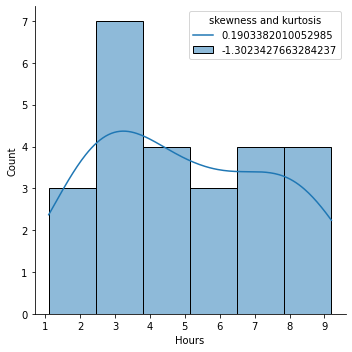

In [7]:
sns.displot(x = 'Hours', data = df, kde = True)
skewness=str(df["Hours"].skew())
kurtosis=str(df["Hours"].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
plt.show();

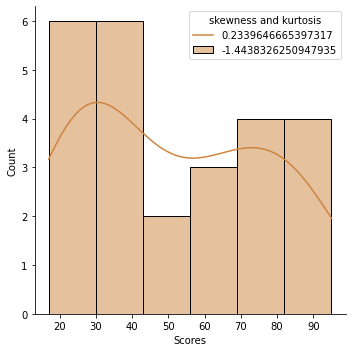

In [8]:
sns.displot(x = 'Scores', data = df, kde = True, color = 'peru')
skewness=str(df["Scores"].skew())
kurtosis=str(df["Scores"].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
plt.show();

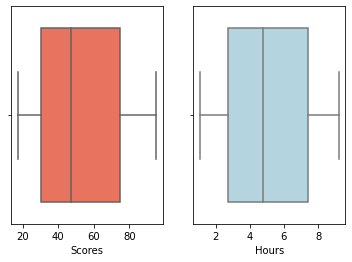

In [9]:
plt.subplot(1, 2, 1)
sns.boxplot(x = 'Scores', data = df, color = 'tomato')
plt.subplot(1, 2, 2)
sns.boxplot(x = 'Hours', data = df, color = 'lightblue');

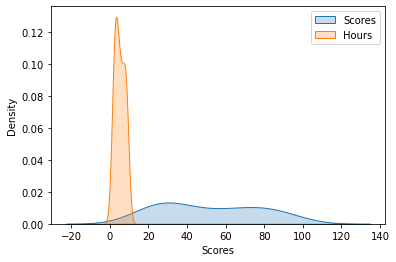

In [10]:
sns.kdeplot(x = 'Scores', data = df, fill = True)
sns.kdeplot(x = 'Hours', data = df, fill = True)
plt.legend(['Scores', 'Hours']);

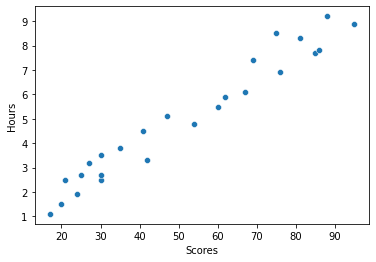

In [11]:
sns.scatterplot(x = 'Scores', y = 'Hours', data = df);

# Modeling

In [12]:
# depending and independing matrix of features
x = df[['Hours']]
y = df['Scores']

In [13]:
# shape of the features
x.shape, y.shape

((25, 1), (25,))

In [14]:
#splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 31)

In [15]:
len(x_train), len(x_test), len(y_train), len(y_test)

(18, 7, 18, 7)

In [16]:
# training with training values
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [17]:
# checking the score
lr.score(x_test, y_test)

0.9596154870690287

In [18]:
# estimated coefficient.
lr.coef_

array([9.40453458])

In [19]:
# compare Actual and predicted values
pd.DataFrame({'Actual Scores': y_test, 'Predicted Scores': lr.predict(x_test)}, index = None)

,Actual Scores,Predicted Scores
9,25,29.721493
22,35,40.066481
15,95,88.029607
7,60,56.054190
5,20,18.436052
0,21,27.840586
21,54,49.471016


In [20]:
# predicting score if a student studies for 9.25 hrs/ day
print(lr.predict([[9.25]]))

[91.32119455]


### Conclusion:  
If a student studies for 9.25 hrs/ day, his/her score will be 91.32.